In [1]:
import numpy as np
from scipy.stats import norm, beta, triang, uniform
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

 1. Write code for creating 200 simple random samples of size 30 from a simulated population of size 1000000 that follows a beta distribution with loc=3, scale =4, 𝛼=1.5, and  𝛽=2.3. If you consider a 96% confidence level, create the corresponding 200 confidence intervals and check with code how many trap the population's mean. Hint: you can approximate the population's mean and standard deviation. Bonus: 1 point extra if you generate a visualization that shows how the confidence intervals are trapping (or, in some cases, not trapping) the population parameter.

In [2]:
pop=beta.rvs(a=1.5,b= 2.3,loc=3,scale=4,size=1000000) #create population with beta disitribution
sample=[np.random.choice(pop, 30) for _ in range(200)] #Create 200 samples of 30
pop_mean=np.mean(pop) #calculate the mean of the population

Mean within Confidence Intervals: 188


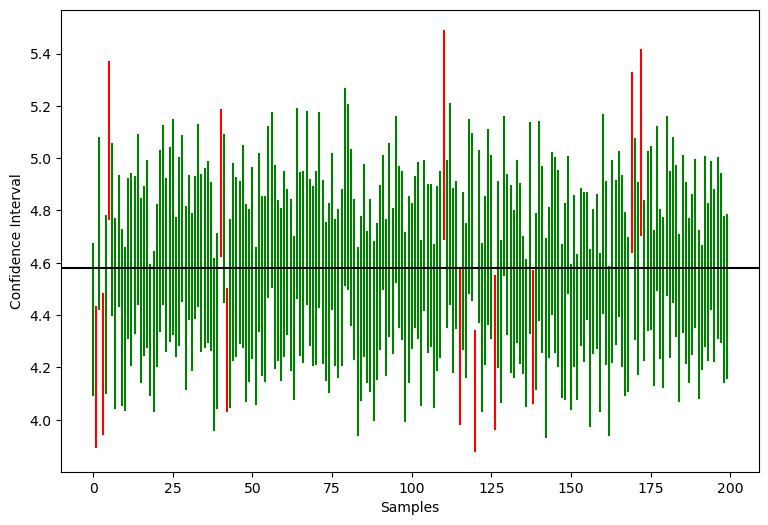

In [3]:
confi=[]
for i in range(200):  #calc confidnece interval
    samp_mean=np.mean(sample[i]) #calculate mean of the sample 
    samp_sd=np.std(sample[i])
    margin_of_error=2.05*(samp_sd / np.sqrt(30)) 
    ci_lower=samp_mean-margin_of_error
    ci_upper=samp_mean+margin_of_error
    confi.append((ci_lower, ci_upper))

contains_mean = [(ci_lower <= pop_mean <= ci_upper) for ci_lower, ci_upper in confi]
n_containing_mean = sum(contains_mean)
print(f'Mean within Confidence Intervals: {n_containing_mean}')  #count num of ci that include mean 

fig, ax = plt.subplots(figsize=(9, 6)) #create plot
for i, (ci_lower, ci_upper) in enumerate(confi): #create sample lines
    color = 'green' if contains_mean[i] else 'red'
    ax.plot([i, i], [ci_lower, ci_upper], color=color)
ax.axhline(pop_mean, color='black', label=f'Population Mean ({pop_mean})') #create line for population mean
ax.set_ylabel('Confidence Interval')
ax.set_xlabel('Samples')
plt.show()

 2. Create a mini-casino with 15 slot machines such that the rewards are distributed as follows:

Machine_1: Normal distribution with mean 0.25 and standard dev. 1 \
Machine_2: Uniform distribution supported between -0.75 and 0.25. \
Machine_3: Triangular distribution supported between -0.25 and 0.75, and the vertex projection splits the base 40%-60%. \
Machine_4 through Machine_10: Beta distribution supported between -0.5 and 1 + 1.5*sin(machine_number), with 𝛽 = 2.3, and 𝛼=1.8 \
Machine_11 Triangular distribution supported between -0.4 and 3, and the vertex projection splits the base 33.3% - 66.7% \
Machine_12 - Machine_15 Uniform distribution supported between -0.4 and 0.6+0.25*cos(machine_number). \
    Which one seems to be the “lucky” machine? (Hint: consider a violin plot) 

In [4]:
def Casino(machine): 
    if(machine == 1):
        return round(norm.rvs(loc=.35,scale=1),2) #set machines 

    if(machine == 2):
        return round(uniform.rvs(loc=-.75,scale=.25),2)

    if(machine == 3):
        return round(triang.rvs(loc=-.25,scale=1,c=0.4),2)

    if(machine>=4 and machine <=10):
        return round(beta.rvs(a=1.8,b= 2.3,loc=-.5,scale=1.5+(1.5*np.sin(machine))),2)

    if(machine ==11):
        return round(triang.rvs(loc=-.4,scale=3.4,c=0.333),2)

    if(machine>=12 and machine <=15): 
        return round(uniform.rvs(loc=-.4,scale=(0.6+0.25*np.cos(machine))),2)
    if(machine >15):
        print("There are only 15 slot machines!")

In [5]:
i=1000000 #set number of iterations

In [6]:
pos = []
for i in range(15): #test all 15 machines
    pos.append(i+1)
def sample_casino(i): #test machines
    sample = []
    for j in range(1000):
        sample.append(Casino(i+1))
    return sample

In [7]:
dat = [sample_casino(i) for i in range(15)]

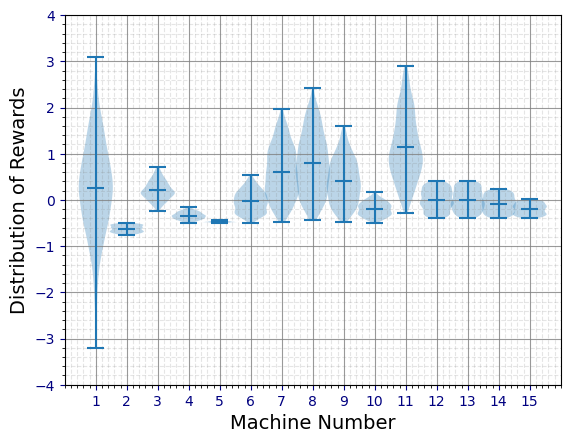

In [8]:
from matplotlib.ticker import MaxNLocator
plt.violinplot(dat, pos, points=200,vert=True, widths=1.1,
                     showmeans=True, showextrema=True, showmedians=False) #violin plots 
plt.xlim(0, 16)
plt.ylim(-4, 4)
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='both',nbins=16))
plt.xlabel('Machine Number',fontsize=14)
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.ylabel('Distribution of Rewards',fontsize=14)
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.minorticks_on()
plt.show() 

Machine Number 11 seems to be the Lucky machine as it has the highest average reward pay back. While 1 does have a tendency to have a larger maxiumum threshold it has a lower average pay back so therefore not the Lucky machine. 

 3. Assume it costs 2 to play each game and you have 200. Implement the Upper Confidence Bound Algorithm and show that it detects the “lucky” machine.

In [9]:
money = 200
cost = 2
c = 2
d = 15 # the number of machines
n = [0] * d # the number of times each machine is played
R = [0] * d # the reward total
max_number_of_plays = 200 # the maximum number of playes
k = 0 # the starting number of plays
UCB = [0] * d
machine_record = []

In [10]:
for i in range(d): 
    n[i] = n[i] + 1
    reward = Casino(i+1)
    R[i] = R[i] + reward
    money = money - cost + reward #calulate remaining amount of money
    k = i + 1
    machine_record.append(i+1) #keep track of the recourd from the machine
    UCB[i] = R[i]/n[i]+c*np.sqrt(np.log(k)/n[i]) 

In [11]:
while (money > cost) & (k < max_number_of_plays): #actually play the machines
    star = np.argmax(UCB)
    machine_record.append(star+1)
    n[star] = n[star] + 1
    k += 1
    reward = Casino(star+1)
    money = money - cost + reward
    R[star] = R[star] + reward
    UCB[star] = R[star]/n[star] + c*np.sqrt(np.log(k)/n[star])

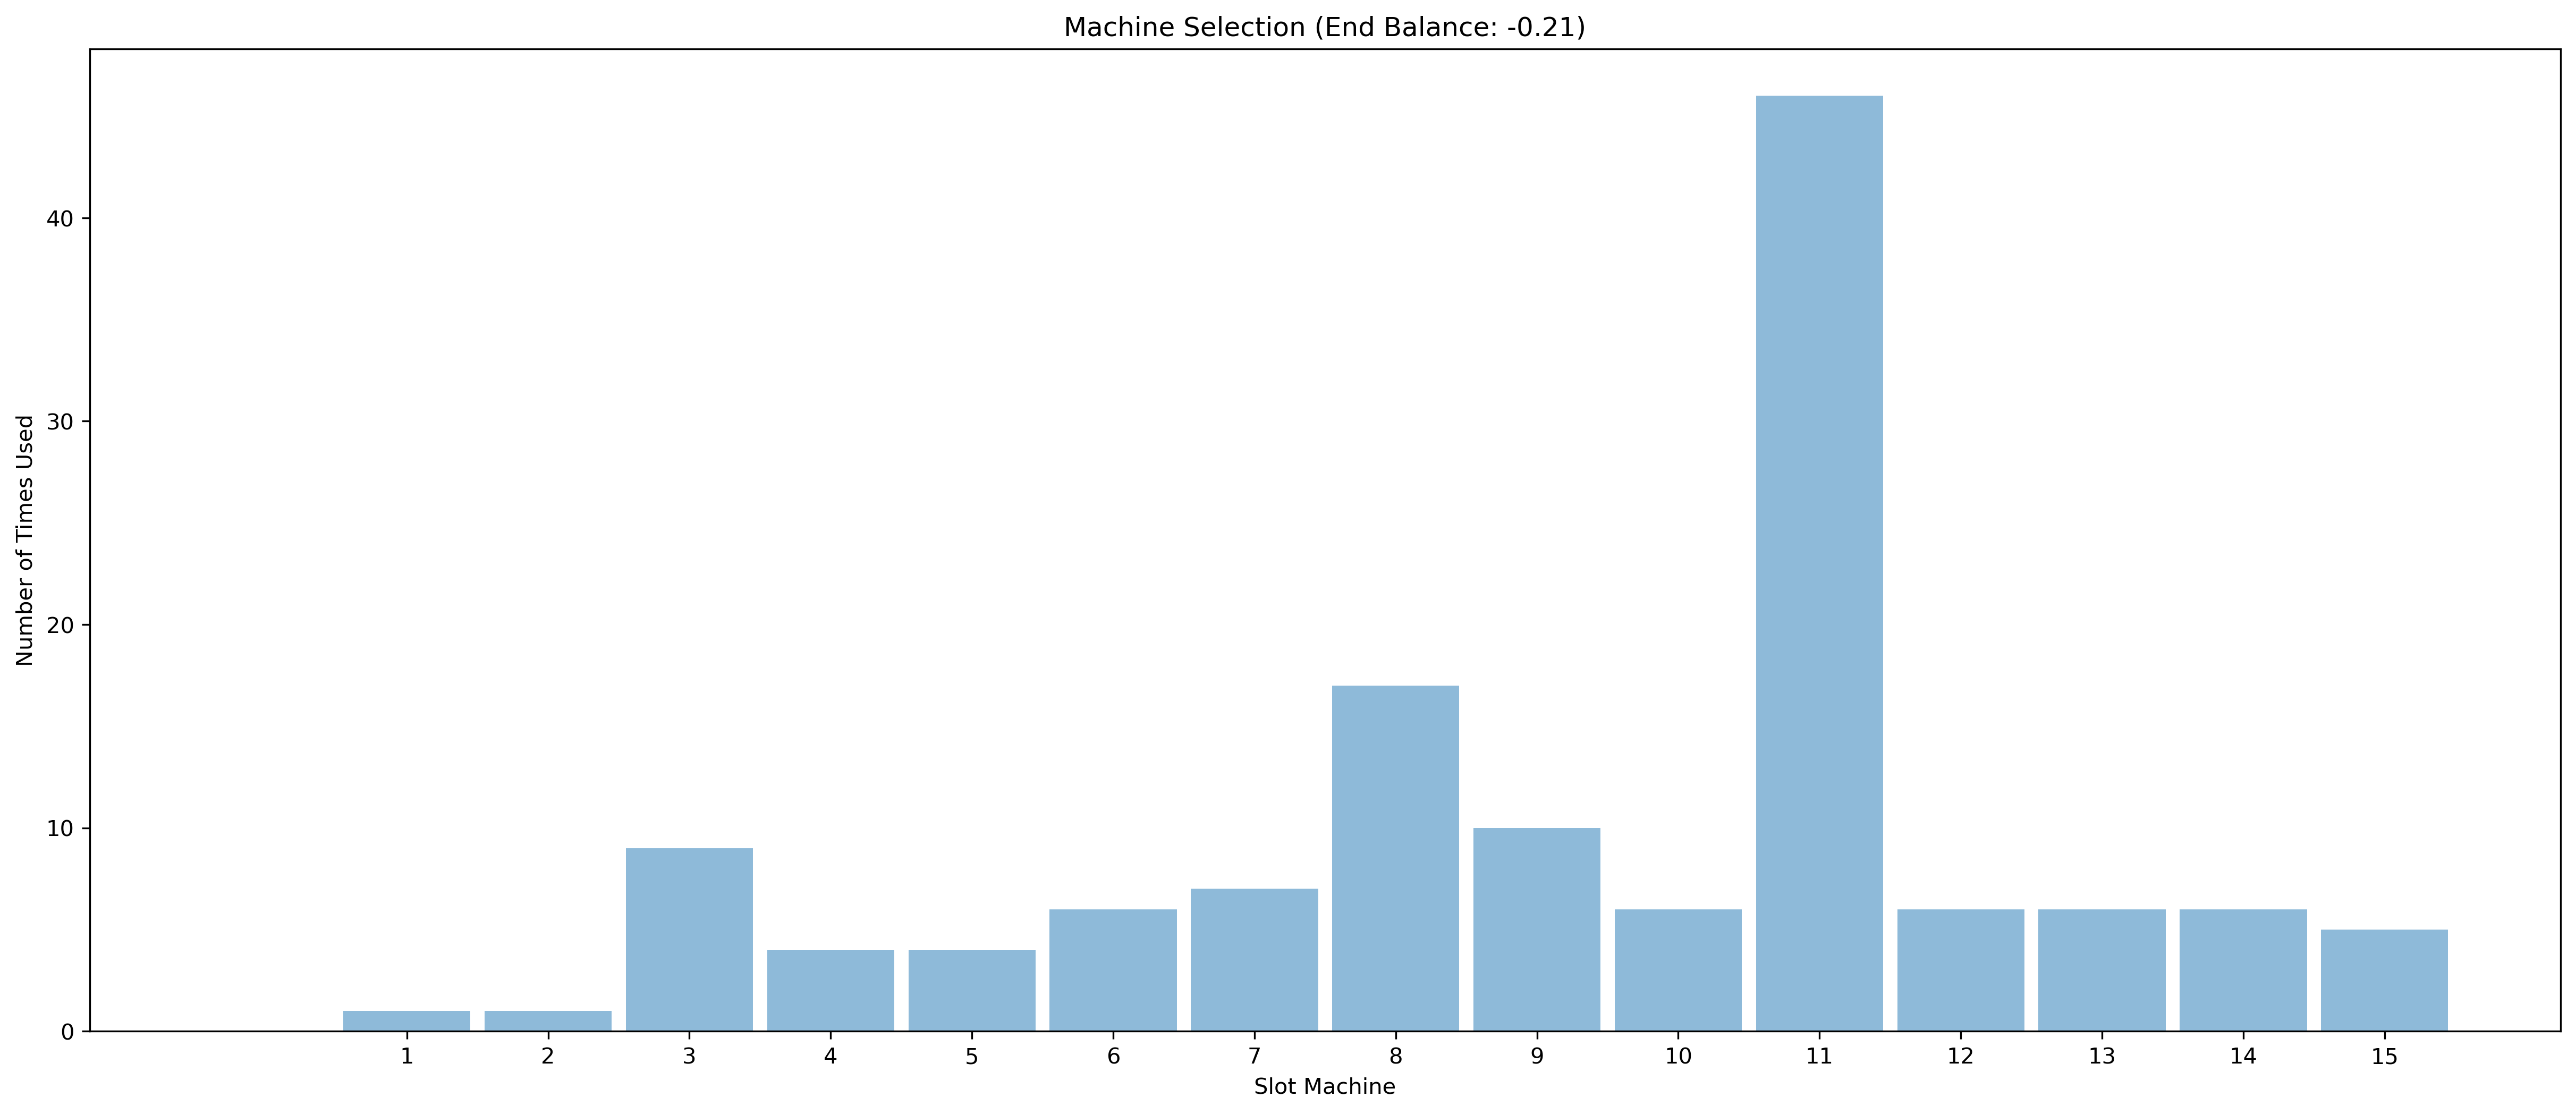

In [12]:
plt.figure(figsize=(20,8),dpi=300)
plt.hist(machine_record,bins=range(17),rwidth=0.9, alpha=0.5,align='left')
plt.title("Machine Selection (End Balance: "+ str(round(money,2))+")")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.xticks(np.arange(1,16,1))
plt.show()

4. Given the same assumptions as before, implement the epsilon-greedy method with epsilon = 0.2. What do you notice in this case when you apply this method multiple times compared to using the UCB algorithm?

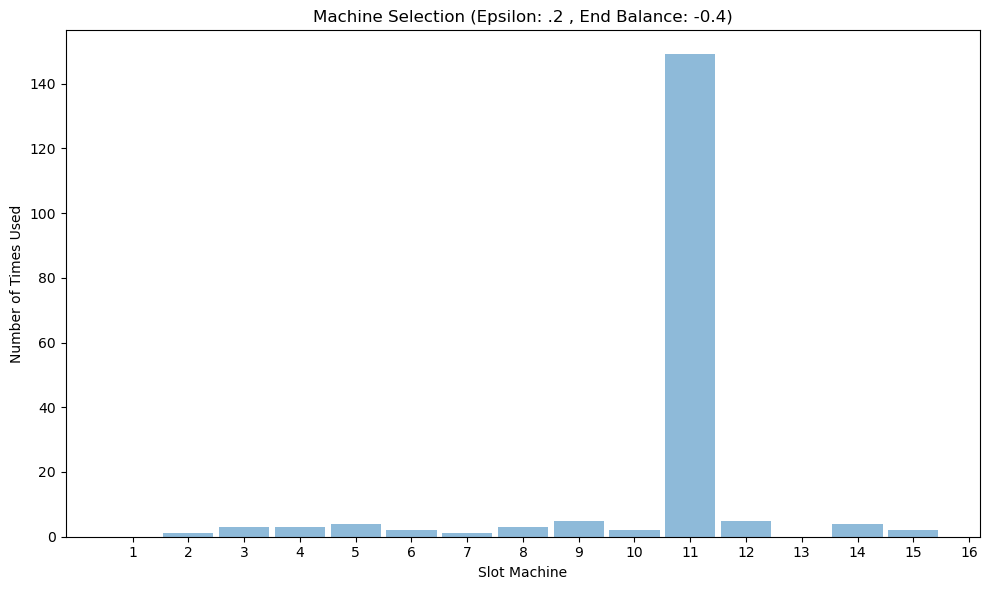

In [13]:
machine_record = []
balance = 200
n = [0] * d  # Number of times each machine is pulled
R = [0] * d  # Total rewards received from each machine

i = 0
while balance >= 0:
    if np.random.random() < .2: #set epsilon
        machine_choice = np.random.randint(1, d + 1) 
    else:
        machine_choice = np.argmax([R[j] / n[j] if n[j] > 0 else 0 for j in range(d)]) + 1 #choose high reward machine

    machine_record.append(machine_choice)
    cash_reward = Casino(machine_choice)
    balance = (balance - 2.0) + cash_reward  #update blanace
    n[machine_choice - 1] += 1  #count of pulls for this machine
    R[machine_choice - 1] += cash_reward  #total mahcine reward

    i += 1  # Increment the pull count

# Plot histogram of machine selections for this epsilon value
plt.figure(figsize=(10, 6))
plt.hist(machine_record, bins=range(1, 17), rwidth=0.9, alpha=0.5, align='left')
plt.title(f"Machine Selection (Epsilon: .2 , End Balance: {round(balance, 2)})")
plt.xlabel("Slot Machine")
plt.ylabel("Number of Times Used")
plt.xticks(np.arange(1, 17, 1))
plt.tight_layout()
plt.show()

The epsilon greedy does a better job at supressing the other machines in comparision to the UCB algorthim. In UCB the choice is consistently 11 however the pulls of other machines are higher compared to that of the epsilon greedy. Another difference is that the epsilon greedy will ocasionaly switch its desired machine to 1 if the first pull is a high positive payback. In my expierence the UCB is more consistent with picking the lucky machine but with less extremity in its results.  

5. Consider the grocery store data provided. Use Pandas classes to find out the names of the products transacted more than 250 times but also less than 300 times. Create a new data frame with all the different purchases (one distinct purchase means the entire set of items bought within one transaction). 

In [14]:
order_data = pd.read_csv('data/order_products_train.csv') #upload data
product_data = pd.read_csv('data/products.csv')

In [15]:
named_orders = pd.merge(order_data,product_data,on='product_id') #merge orders and IDS
counts = named_orders['product_name'].value_counts() #compare the names to IDs
counts = counts[(counts > 250) & (counts < 300)] #pulls products less then 300 but more then 250
counts=pd.DataFrame(counts) #convert to data frame

In [16]:
counts

,count
product_name,
Organic Chocolate Chip Chewy Granola Bars,299
Naked Green Machine Boosted Juice Smoothie,299
Spaghetti No 12,299
Jalapeno Hummus,298
Cola Soft Drink,298
...,...
Gluten Free White Sandwich Bread,252
Mandarins Bag,252
Organic & Raw Strawberry Serenity Kombucha,252
